In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
history = pd.read_csv("history (2).tsv", sep='\t')
users = pd.read_csv("users (2).tsv", sep='\t')
valid = pd.read_csv("validate (1).tsv", sep='\t')
valid_ans = pd.read_csv("validate_answers (1).tsv", sep='\t')

In [4]:
history.head()

,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148


In [5]:
users.head()

,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4


In [6]:
valid.head()

,cpm,hour_start,hour_end,publishers,audience_size,user_ids
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1..."
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3..."
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5..."
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524..."
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2..."


In [7]:
valid_ans.head()

,at_least_one,at_least_two,at_least_three
0,0.0430,0.0152,0.0073
1,0.0130,0.0000,0.0000
2,0.0878,0.0135,0.0000
3,0.2295,0.1295,0.0727
4,0.3963,0.2785,0.2270


сначала пропуски

In [8]:
history.isnull().sum()

,0
hour,0
cpm,0
publisher,0
user_id,0


In [9]:
users.isnull().sum()

,0
user_id,0
sex,0
age,0
city_id,0


In [10]:
valid.isnull().sum()

,0
cpm,0
hour_start,0
hour_end,0
publishers,0
audience_size,0
user_ids,0


In [11]:
valid_ans.isnull().sum()

,0
at_least_one,0
at_least_two,0
at_least_three,0


пропусков нет, теперь посмотрим сами данные

сначала History

In [12]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147857 entries, 0 to 1147856
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   hour       1147857 non-null  int64  
 1   cpm        1147857 non-null  float64
 2   publisher  1147857 non-null  int64  
 3   user_id    1147857 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 35.0 MB


In [13]:
history.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,1147857.0,760.301650,430.615943,3.0,392.0,762.0,1138.0,1490.00
cpm,1147857.0,186.404297,455.725739,30.0,55.0,110.0,210.0,209053.98
publisher,1147857.0,2.004760,2.061949,1.0,1.0,1.0,2.0,21.00
user_id,1147857.0,13847.392223,8028.620459,0.0,6817.0,13941.0,20759.0,27768.00


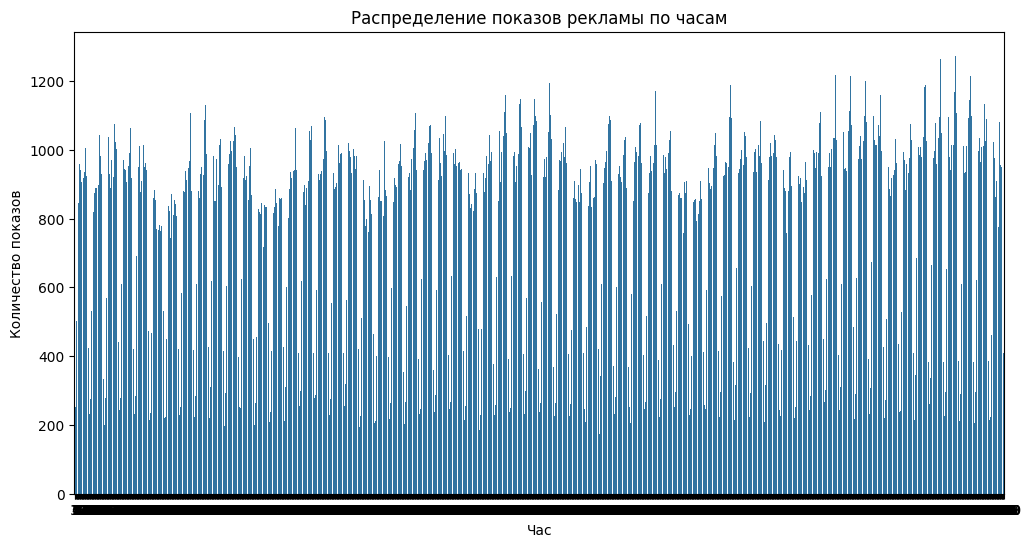

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=history)
plt.title('Распределение показов рекламы по часам')
plt.xlabel('Час')
plt.ylabel('Количество показов')
plt.show()

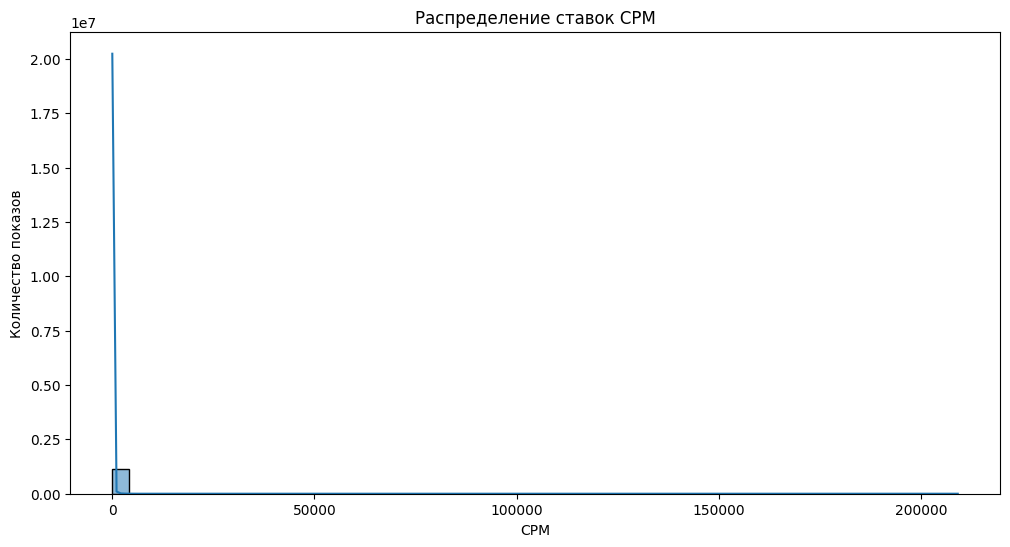

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(history['cpm'], bins=50, kde=True)
plt.title('Распределение ставок CPM')
plt.xlabel('CPM')
plt.ylabel('Количество показов')
plt.show()

тут ставки сильно смещены влево. попробуем отлогарифировать

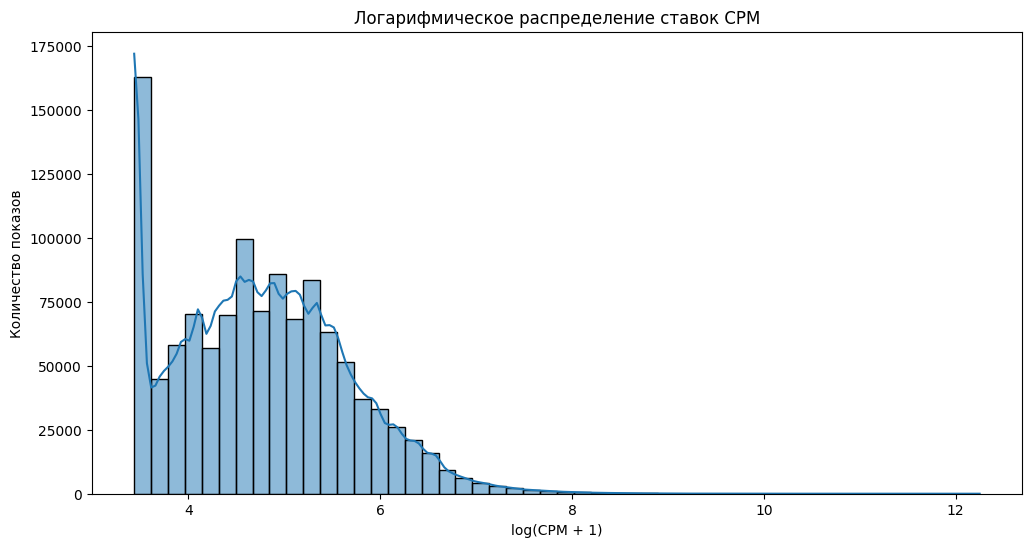

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(history['cpm']), bins=50, kde=True)
plt.title('Логарифмическое распределение ставок CPM')
plt.xlabel('log(CPM + 1)')
plt.ylabel('Количество показов')
plt.show()

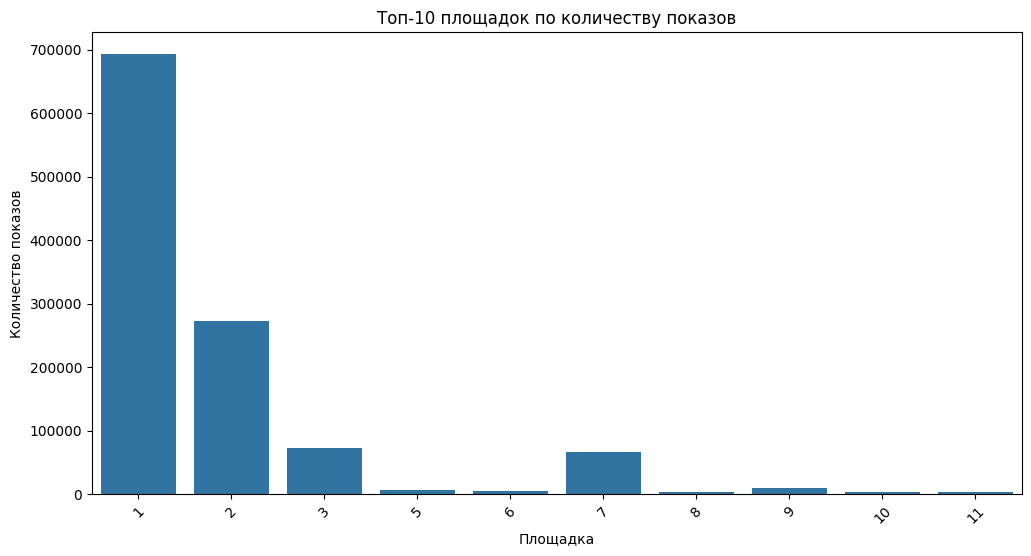

In [16]:
plt.figure(figsize=(12, 6))
top_publishers = history['publisher'].value_counts().head(10)
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Топ-10 площадок по количеству показов')
plt.xlabel('Площадка')
plt.ylabel('Количество показов')
plt.xticks(rotation=45)
plt.show()

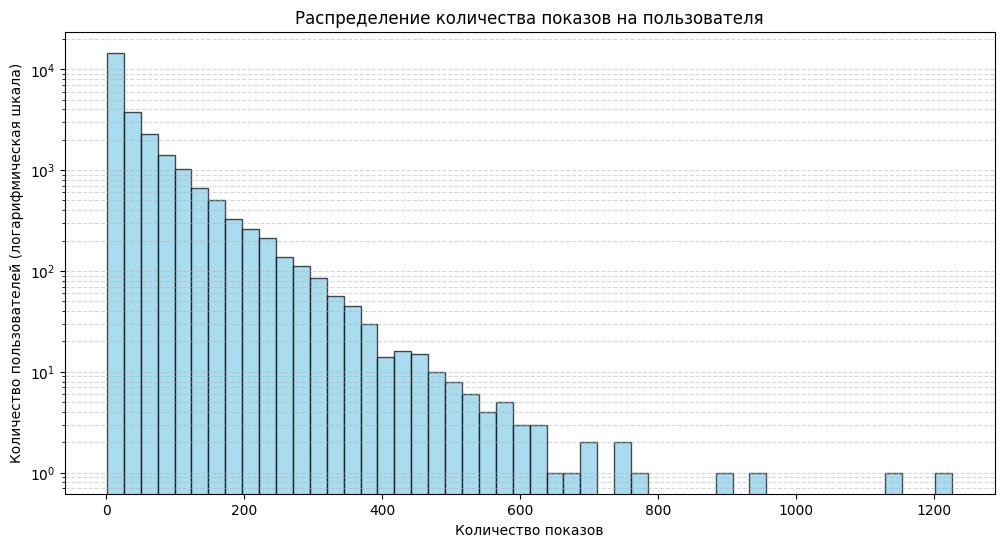

In [22]:
views_per_user = history['user_id'].value_counts()
plt.figure(figsize=(12, 6))
plt.hist(views_per_user, bins=50, log=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение количества показов на пользователя')
plt.xlabel('Количество показов')
plt.ylabel('Количество пользователей (логарифмическая шкала)')
plt.grid(axis='y', which='both', linestyle='--', alpha=0.5)
plt.show()


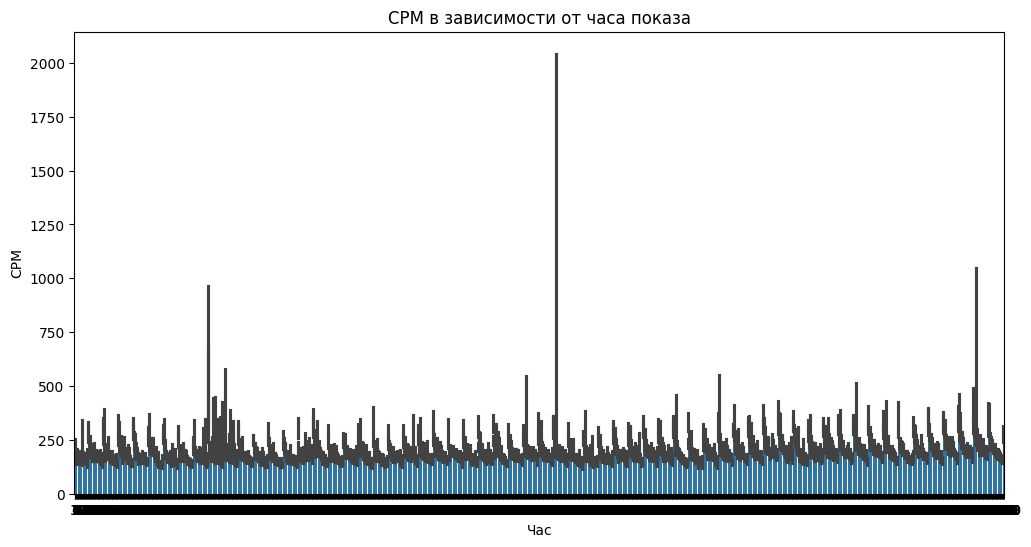

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='cpm', data=history)
plt.title('CPM в зависимости от часа показа')
plt.xlabel('Час')
plt.ylabel('CPM')
plt.show()

теперь перейдем к users

In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27769 entries, 0 to 27768
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  27769 non-null  int64
 1   sex      27769 non-null  int64
 2   age      27769 non-null  int64
 3   city_id  27769 non-null  int64
dtypes: int64(4)
memory usage: 867.9 KB


In [28]:
users.describe()

,user_id,sex,age,city_id
count,27769.000000,27769.000000,27769.000000,27769.000000
mean,13884.000000,1.475134,28.894847,240.141165
std,8016.364149,0.501549,18.510084,466.122195
min,0.000000,0.000000,0.000000,0.000000
25%,6942.000000,1.000000,18.000000,0.000000
50%,13884.000000,1.000000,27.000000,25.000000
75%,20826.000000,2.000000,36.000000,231.000000
max,27768.000000,2.000000,118.000000,2456.000000


In [35]:
users['sex'].value_counts()

,count
sex,
1,14515
2,13224
0,30


тут 0 непонятного пола и записей всего 30, удалим их

In [36]:
users.drop(users[users['sex'] == 0].index, inplace=True)

In [37]:
users['sex'].value_counts()

,count
sex,
1,14515
2,13224


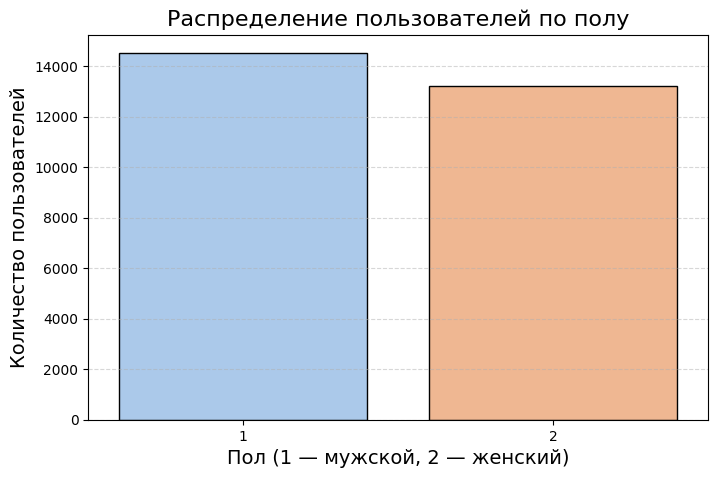

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='sex', data=users, palette='pastel', edgecolor='black', legend=False)
plt.title('Распределение пользователей по полу', fontsize=16)
plt.xlabel('Пол (1 — мужской, 2 — женский)', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

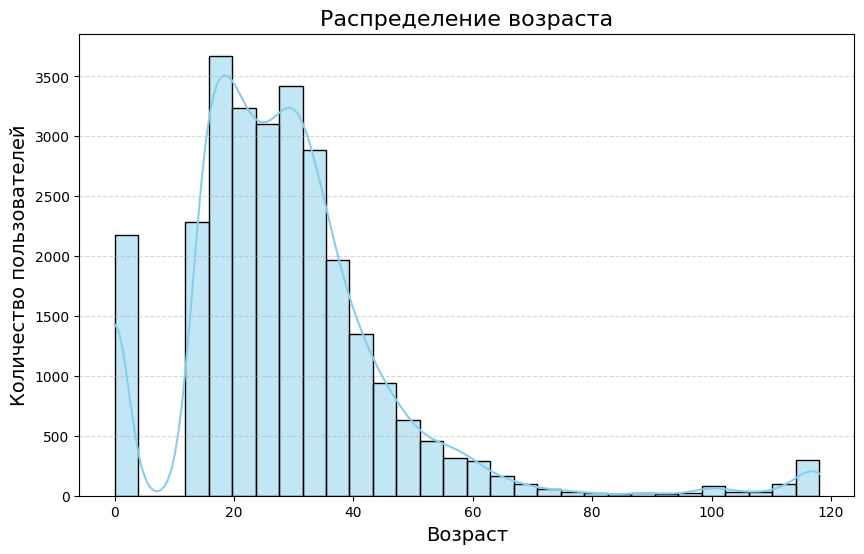

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Распределение возраста', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

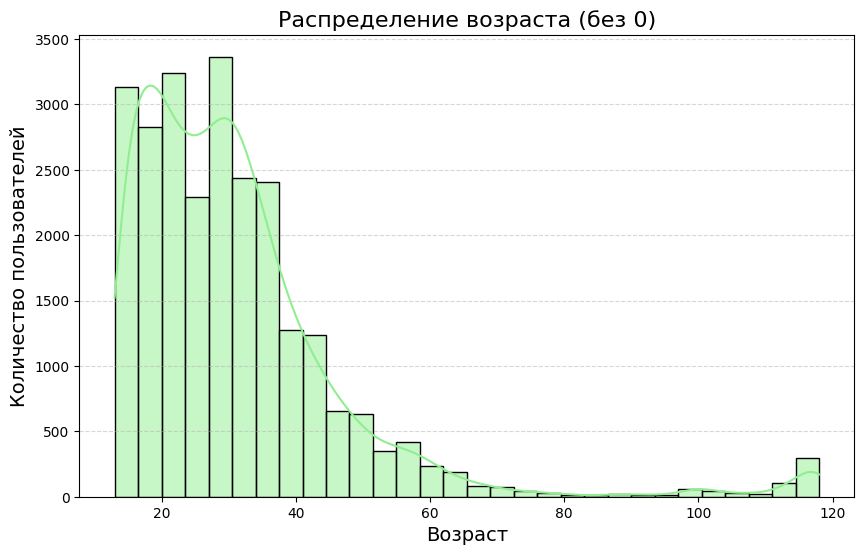

Доля пользователей с неуказанным возрастом (0): 0.0785897112368867


In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(users[users['age'] > 0]['age'], bins=30, kde=True, color='lightgreen', edgecolor='black')
plt.title('Распределение возраста (без 0)', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("Доля пользователей с неуказанным возрастом (0):", (users['age'] == 0).mean())


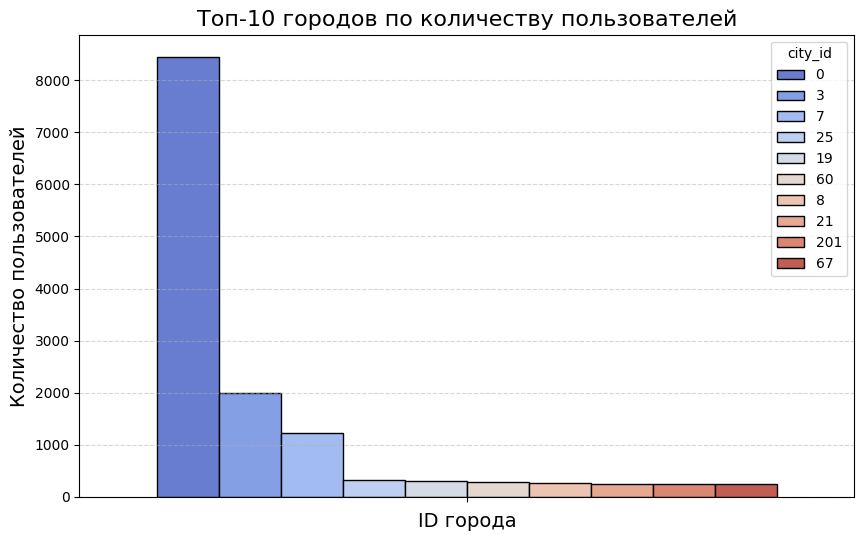

Количество пользователей с неизвестным городом (0): 8453


In [45]:
top_cities = users['city_id'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(hue=top_cities.index.astype(str), y=top_cities.values, palette='coolwarm', edgecolor='black')
plt.title('Топ-10 городов по количеству пользователей', fontsize=16)
plt.xlabel('ID города', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("Количество пользователей с неизвестным городом (0):", (users['city_id'] == 0).sum())

связь между возрастом и полом

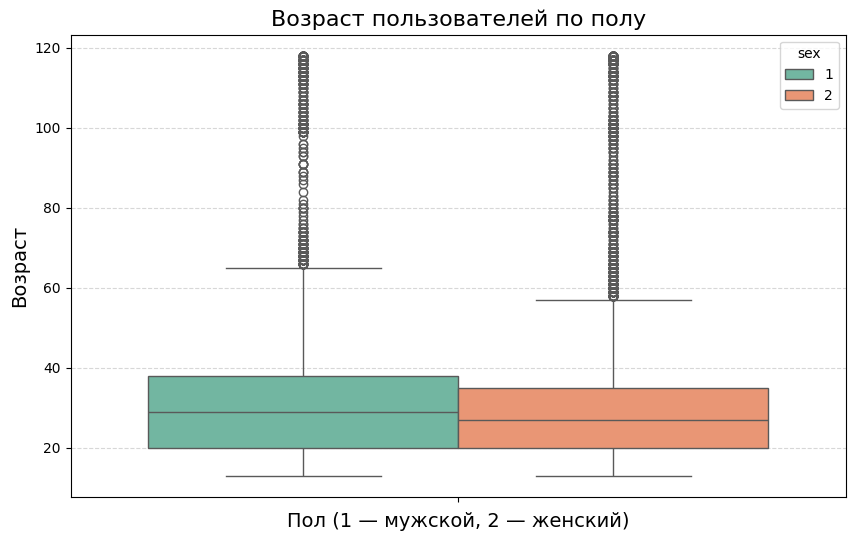

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(hue='sex', y='age', data=users[users['age'] > 0], palette='Set2')
plt.title('Возраст пользователей по полу', fontsize=16)
plt.xlabel('Пол (1 — мужской, 2 — женский)', fontsize=14)
plt.ylabel('Возраст', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

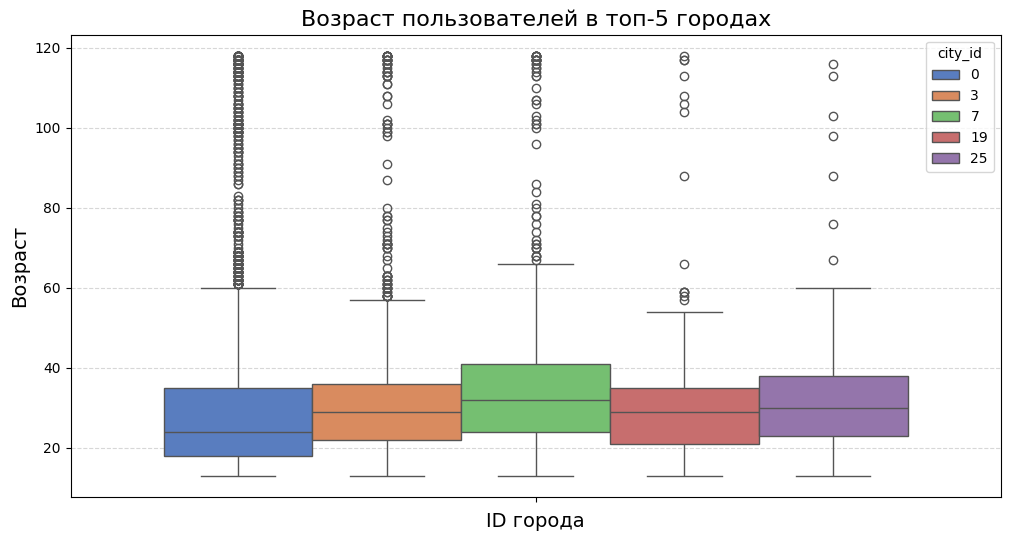

In [49]:
top_city_ids = users['city_id'].value_counts().head(5).index
filtered_users = users[(users['city_id'].isin(top_city_ids)) & (users['age'] > 0)]

plt.figure(figsize=(12, 6))
sns.boxplot(hue='city_id', y='age', data=filtered_users, palette='muted')
plt.title('Возраст пользователей в топ-5 городах', fontsize=16)
plt.xlabel('ID города', fontsize=14)
plt.ylabel('Возраст', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


теперь validate

In [51]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpm            1008 non-null   float64
 1   hour_start     1008 non-null   int64  
 2   hour_end       1008 non-null   int64  
 3   publishers     1008 non-null   object 
 4   audience_size  1008 non-null   int64  
 5   user_ids       1008 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.4+ KB


In [53]:
valid.describe().T

,count,mean,std,min,25%,50%,75%,max
cpm,1008.0,162.425595,112.192984,30.0,79.0,130.0,220.00,475.0
hour_start,1008.0,1065.046627,192.984789,747.0,906.0,1048.0,1214.25,1485.0
hour_end,1008.0,1166.225198,192.168496,753.0,1019.0,1184.0,1325.25,1488.0
audience_size,1008.0,1090.087302,613.557243,300.0,575.0,960.0,1464.00,2500.0


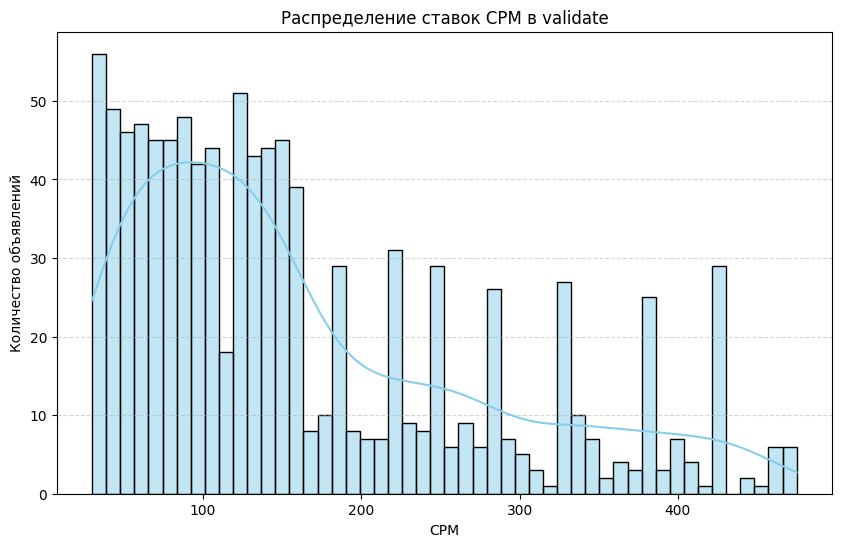

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(valid['cpm'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Распределение ставок CPM в validate')
plt.xlabel('CPM')
plt.ylabel('Количество объявлений')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

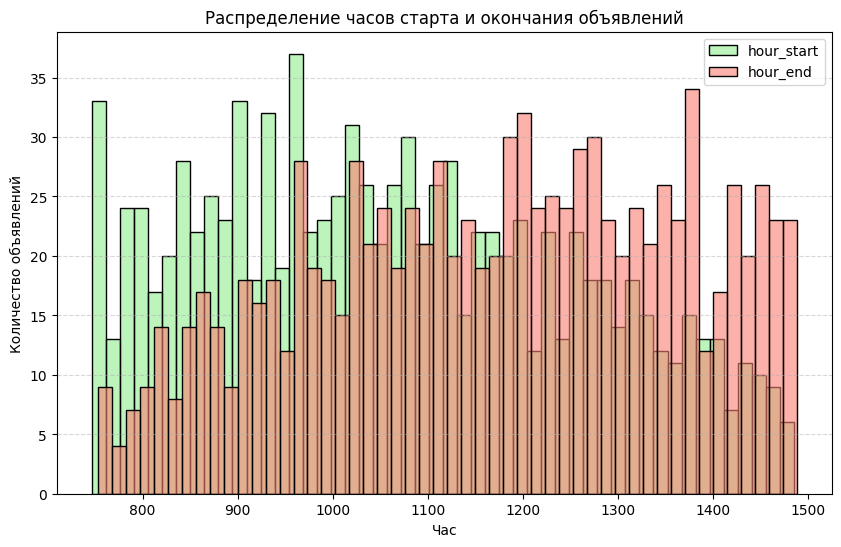

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(valid['hour_start'], bins=50, color='lightgreen', edgecolor='black', label='hour_start', alpha=0.6)
sns.histplot(valid['hour_end'], bins=50, color='salmon', edgecolor='black', label='hour_end', alpha=0.6)
plt.title('Распределение часов старта и окончания объявлений')
plt.xlabel('Час')
plt.ylabel('Количество объявлений')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


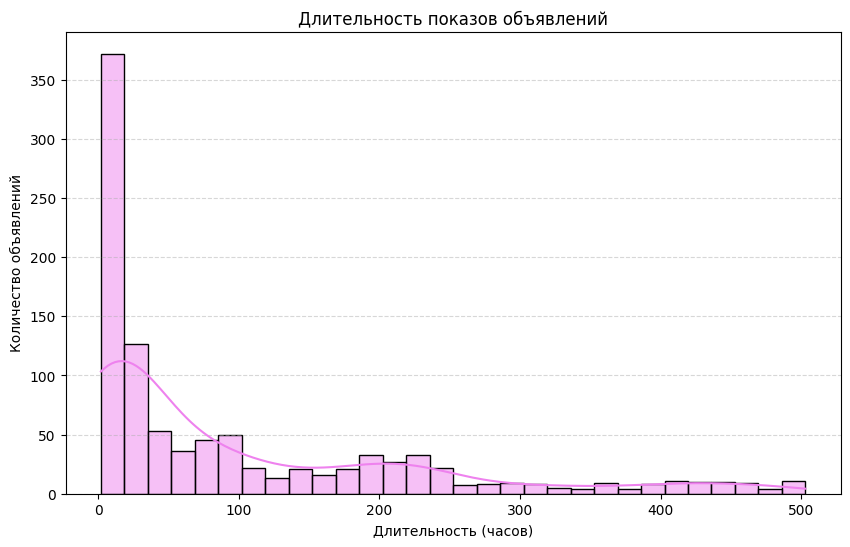

In [57]:
valid['duration'] = valid['hour_end'] - valid['hour_start']

plt.figure(figsize=(10, 6))
sns.histplot(valid['duration'], bins=30, kde=True, color='violet', edgecolor='black')
plt.title('Длительность показов объявлений')
plt.xlabel('Длительность (часов)')
plt.ylabel('Количество объявлений')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

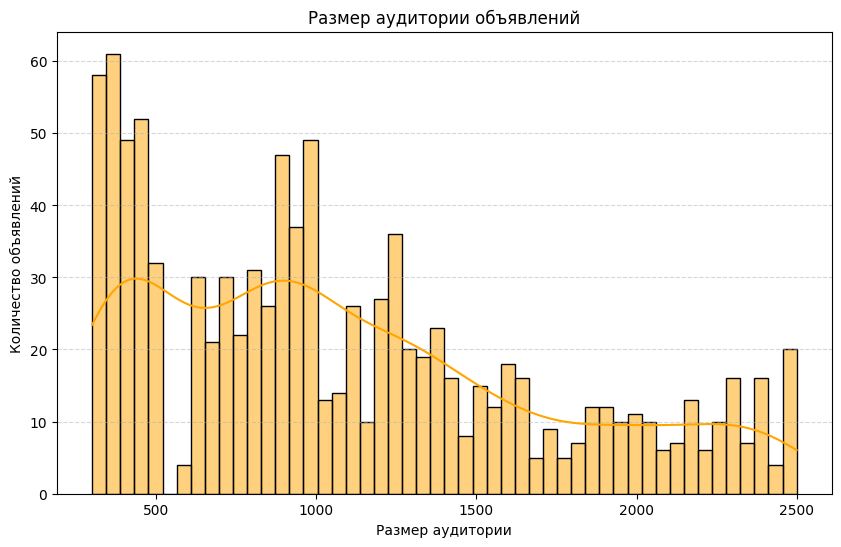

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(valid['audience_size'], bins=50, kde=True, color='orange', edgecolor='black')
plt.title('Размер аудитории объявлений')
plt.xlabel('Размер аудитории')
plt.ylabel('Количество объявлений')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

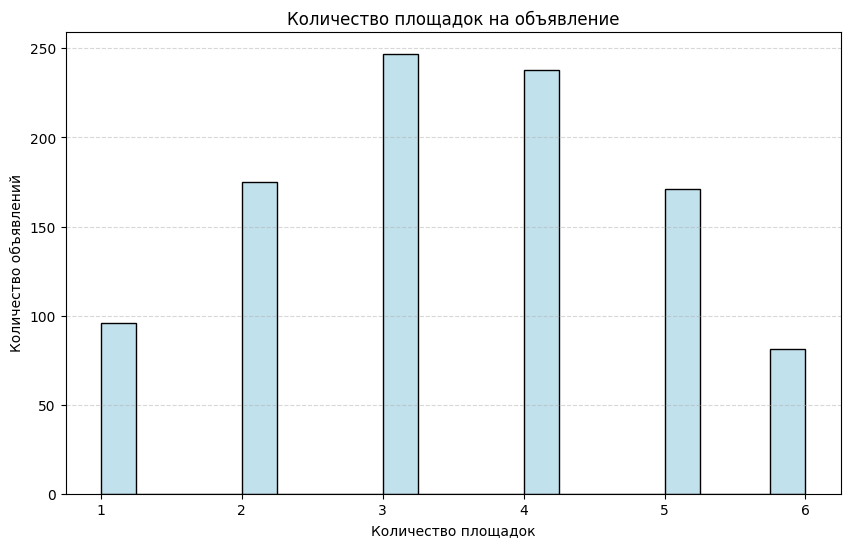

In [59]:
valid['num_publishers'] = valid['publishers'].apply(lambda x: len(x.split(',')))

plt.figure(figsize=(10, 6))
sns.histplot(valid['num_publishers'], bins=20, color='lightblue', edgecolor='black')
plt.title('Количество площадок на объявление')
plt.xlabel('Количество площадок')
plt.ylabel('Количество объявлений')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

теперь validate_answers

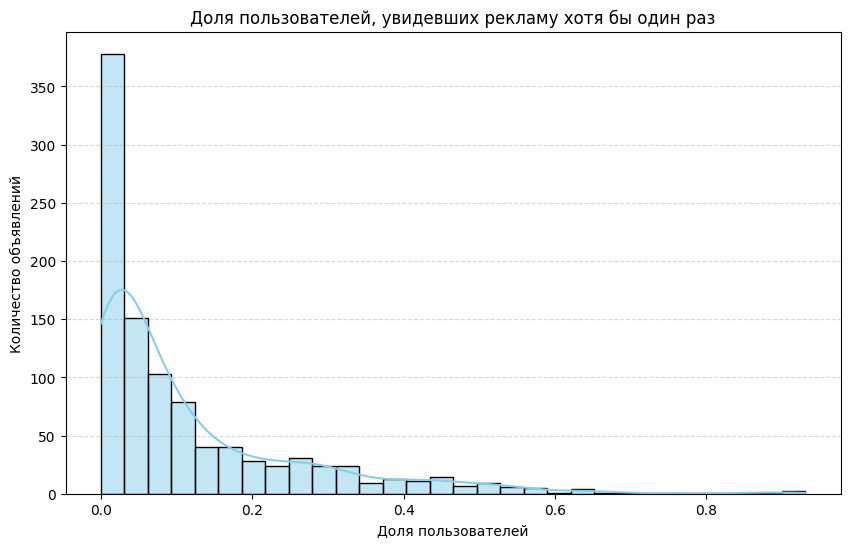

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(valid_ans['at_least_one'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Доля пользователей, увидевших рекламу хотя бы один раз')
plt.xlabel('Доля пользователей')
plt.ylabel('Количество объявлений')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

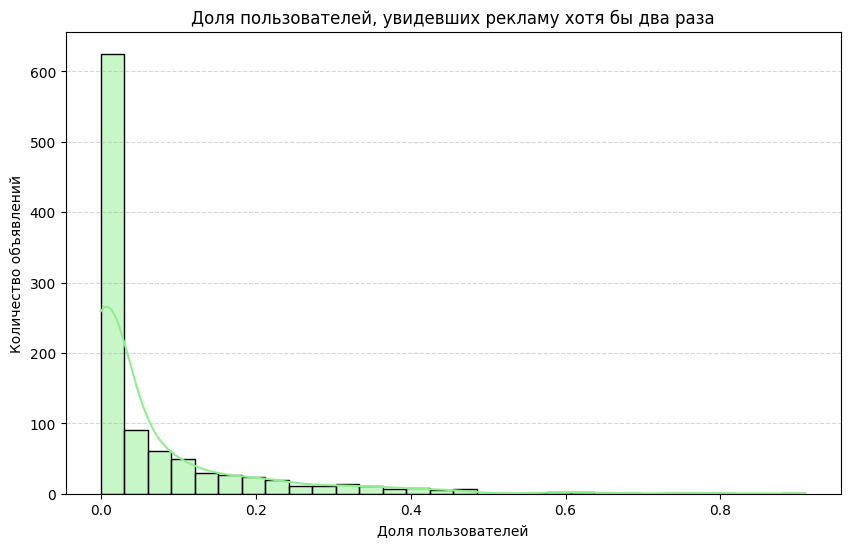

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(valid_ans['at_least_two'], bins=30, kde=True, color='lightgreen', edgecolor='black')
plt.title('Доля пользователей, увидевших рекламу хотя бы два раза')
plt.xlabel('Доля пользователей')
plt.ylabel('Количество объявлений')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


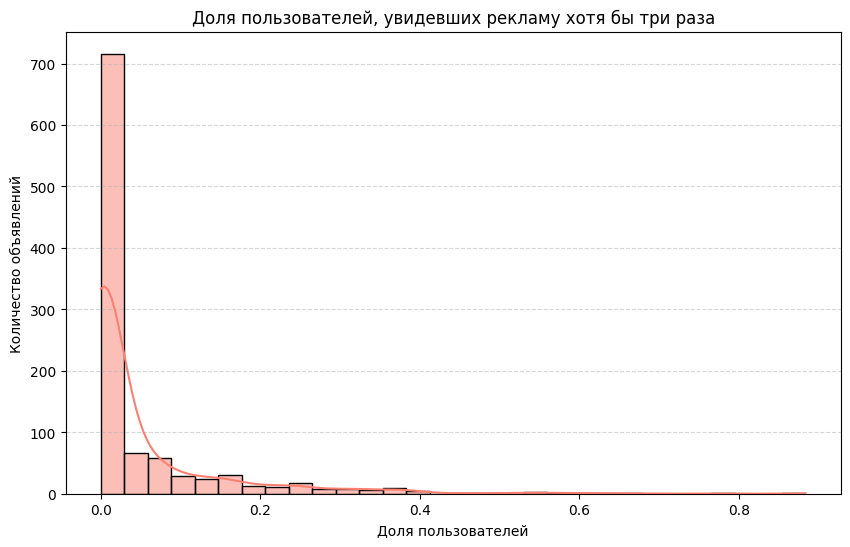

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(valid_ans['at_least_three'], bins=30, kde=True, color='salmon', edgecolor='black')
plt.title('Доля пользователей, увидевших рекламу хотя бы три раза')
plt.xlabel('Доля пользователей')
plt.ylabel('Количество объявлений')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


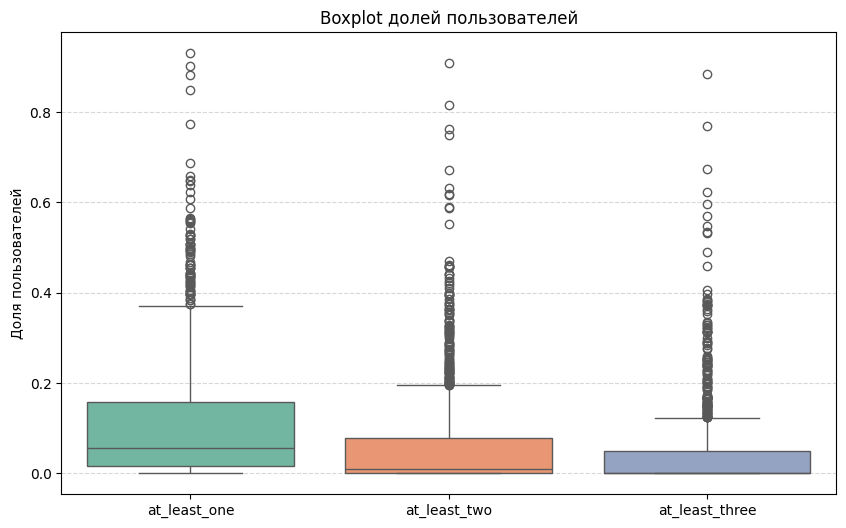

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=valid_ans[['at_least_one', 'at_least_two', 'at_least_three']], palette='Set2')
plt.title('Boxplot долей пользователей')
plt.ylabel('Доля пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


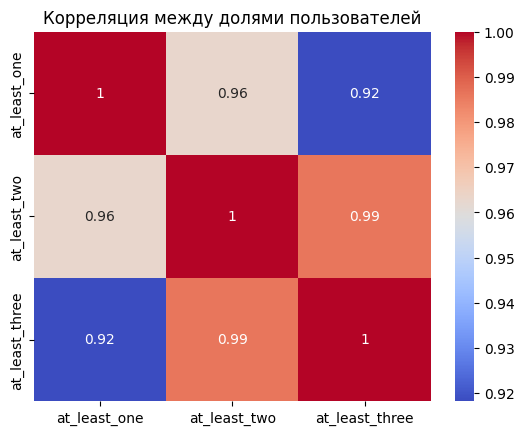

In [64]:
corr = valid_ans.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция между долями пользователей')
plt.show()


объединим таблицы

In [66]:
user_features = history.groupby('user_id').agg({
    'cpm': ['mean', 'median'],
    'hour': 'count',
    'publisher': pd.Series.nunique
})
user_features.columns = ['avg_cpm', 'median_cpm', 'total_views', 'unique_publishers']
user_features = user_features.reset_index()
user_features.head()

,user_id,avg_cpm,median_cpm,total_views,unique_publishers
0,0,2053.830000,2053.83,2,1
1,1,124.068049,90.00,82,1
2,3,370.880000,288.13,8,2
3,4,44.627955,30.16,132,2
4,5,91.055556,42.50,9,1


In [67]:
user_full_features = pd.merge(users, user_features, on='user_id', how='left')
user_full_features.fillna({
    'avg_cpm': 0,
    'median_cpm': 0,
    'total_views': 0,
    'unique_publishers': 0
}, inplace=True)

user_full_features.head()

,user_id,sex,age,city_id,avg_cpm,median_cpm,total_views,unique_publishers
0,0,2,19,0,2053.830000,2053.83,2.0,1.0
1,1,1,0,1,124.068049,90.00,82.0,1.0
2,2,2,24,2,0.000000,0.00,0.0,0.0
3,3,1,20,3,370.880000,288.13,8.0,2.0
4,4,2,29,4,44.627955,30.16,132.0,2.0


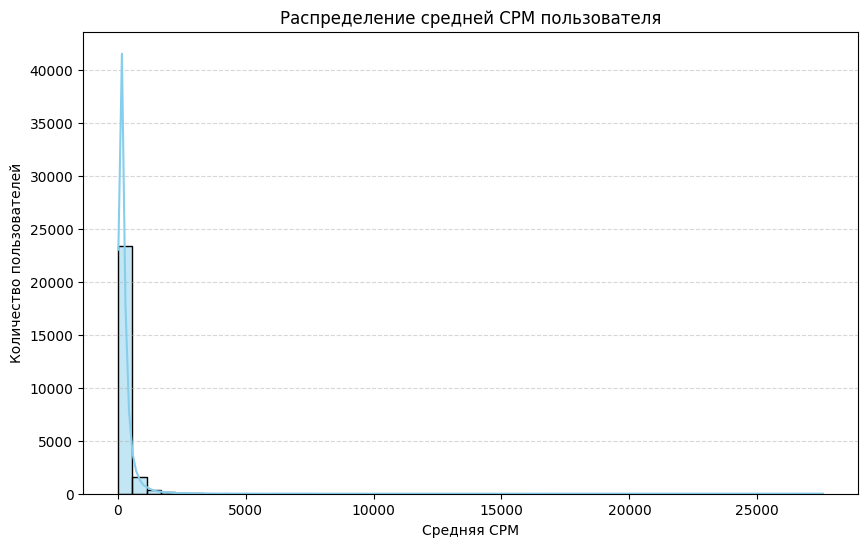

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(user_features['avg_cpm'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Распределение средней CPM пользователя')
plt.xlabel('Средняя CPM')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


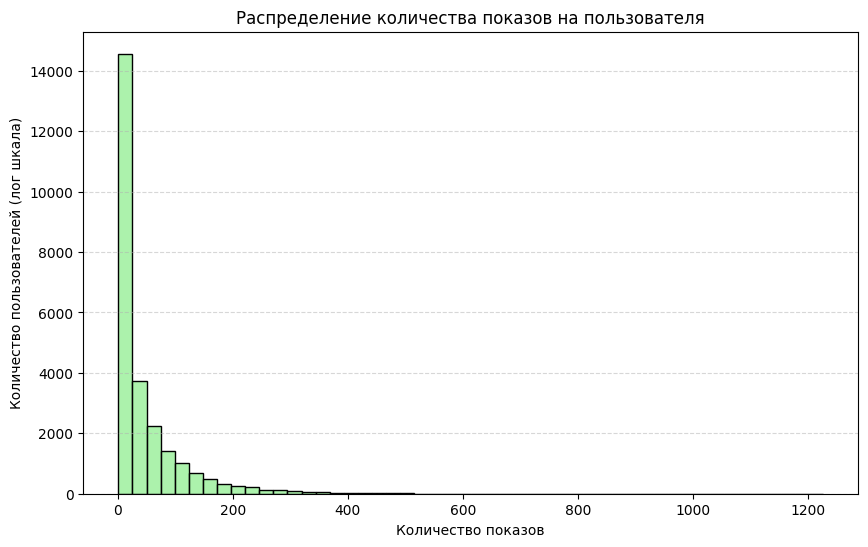

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(user_features['total_views'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Распределение количества показов на пользователя')
plt.xlabel('Количество показов')
plt.ylabel('Количество пользователей (лог шкала)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


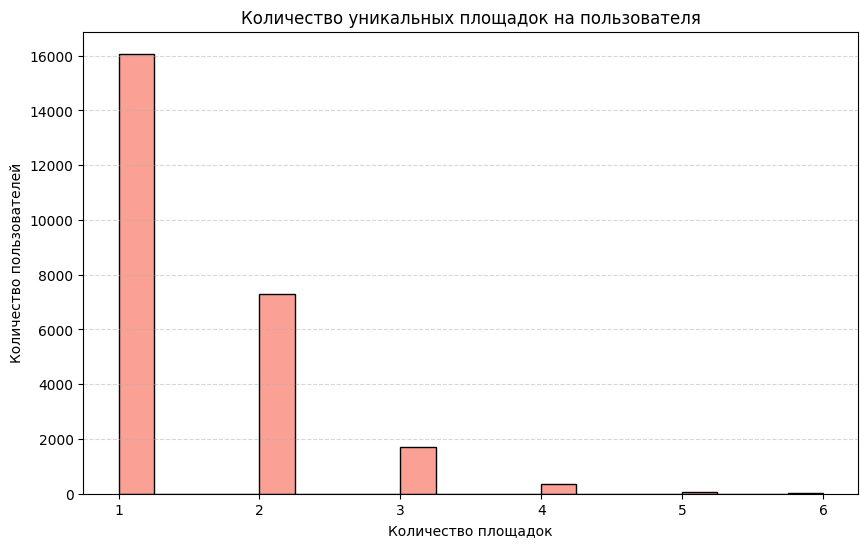

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(user_features['unique_publishers'], bins=20, color='salmon', edgecolor='black')
plt.title('Количество уникальных площадок на пользователя')
plt.xlabel('Количество площадок')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
